In [1]:
import matplotlib.pyplot as plt
import open3d as o3d
import scipy.optimize as optimize
import numpy as np
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit



[[124.86872494 136.93184912 152.25468327]
 [ 87.40699795 115.30059852 148.65560973]
 [ 96.98105675 177.89098566 222.55375693]]
[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


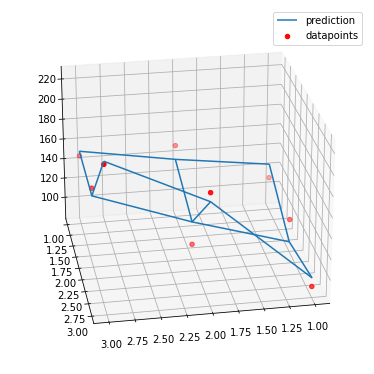

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)
# set dimension of the data
dim = 3
# create random data, which will be the target values
Z = (np.ones((dim,dim)) * np.arange(1,dim+1,1))**3 + np.random.rand(dim,dim) * 200 

# create a 2D-mesh
x = np.arange(1,dim+1).reshape(dim,1)
y = np.arange(1,dim+1).reshape(1,dim)
X,Y = np.meshgrid(x,y)

# calculate polynomial features based on the input mesh
features = {}
features['x^0*y^0'] = np.matmul(x**0,y**0).flatten()
features['x*y'] = np.matmul(x,y).flatten()
features['x*y^2'] = np.matmul(x,y**2).flatten()
features['x^2*y^0'] = np.matmul(x**2, y**0).flatten()
features['x^2*y'] = np.matmul(x**2, y).flatten()
features['x^3*y^2'] = np.matmul(x**3, y**2).flatten()
features['x^3*y'] = np.matmul(x**3, y).flatten()
features['x^0*y^3'] = np.matmul(x**0, y**3).flatten()
dataset = pd.DataFrame(features)

# fit a linear regression model
reg = LinearRegression().fit(dataset.values, Z.flatten())
# get coefficients and calculate the predictions 
z_pred = reg.intercept_ + np.matmul(dataset.values, reg.coef_.reshape(-1,1)).reshape(dim,dim)

# visualize the results
fig = plt.figure(figsize = (5,5))
ax = Axes3D(fig)
# plot the fitted curve
ax.plot_wireframe(X, Y, z_pred, label = 'prediction')
# plot the target values
ax.scatter(X, Y, Z, c = 'r', label = 'datapoints')
ax.view_init(25, 80)
plt.legend()

print(z_pred)
print(X)
print(Y)

In [3]:
import scipy.optimize as optimize
import numpy as np
XY = [(11, 70), (11, 75), (11, 80), (11, 85), (12, 70), (12, 75), (12, 80), (12, 85), (13, 70), (13, 75), (13, 80), (13, 85)]

Z = [203.84, 208, 218.4, 235.872, 228.30080000000004, 232.96000000000004, 244.60800000000006, 264.1766400000001, 254.8, 260, 273, 294.84000000000003]

guess = (1,1,1,1,1,1)

def fit(X, a, b, c, d, f, g):
    return a + (b*X[0])+(c*X[1])+(d*X[0]**2)+(f*X[1]**2)+(g*X[0]*X[1])

params, cov = optimize.curve_fit(fit, np.transpose(XY), Z, guess)

<ipython-input-4-b92c60cc27ee>:10: DeprecationWarning: scipy.asarray is deprecated and will be removed in SciPy 2.0.0, use numpy.asarray instead
  angles = ar(angles)
<ipython-input-4-b92c60cc27ee>:11: DeprecationWarning: scipy.asarray is deprecated and will be removed in SciPy 2.0.0, use numpy.asarray instead
  data = ar(data)
<ipython-input-4-b92c60cc27ee>:15: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sigma = sqrt(sum(data*(angles-mean)**2)/n)
<ipython-input-4-b92c60cc27ee>:18: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*exp(-(x-mu)**2/(2*sigma**2))
<ipython-input-4-b92c60cc27ee>:18: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*exp(-(x-mu)**2/(2*sigma**2))


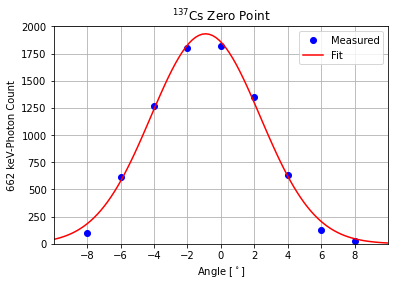

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
import math


angles = [-8, -6, -4, -2, 0, 2, 4, 6, 8]
data = [99, 610, 1271, 1804, 1823, 1346, 635, 125, 24]
angles = ar(angles)
data = ar(data)

n = len(data)  ## <---
mean = sum(data*angles)/n
sigma = sqrt(sum(data*(angles-mean)**2)/n)

def gaus(x,a,mu,sigma):
    return a*exp(-(x-mu)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,angles,data)#,p0=[0.18,mean,sigma])  ## <--- leave out the first estimation of the parameters
xx = np.linspace( -10, 10, 100 )  ## <--- calculate against a continuous variable

fig = plt.figure()
plt.plot(angles, data, "ob", label = "Measured")
plt.plot(xx,gaus(xx,*popt),'r',label='Fit')  ## <--- plot against the contious variable
plt.xlim(-10, 10)
plt.ylim(0, 2000)
plt.xticks(angles)
plt.title("$^{137}$Cs Zero Point")
plt.xlabel("Angle [$^\circ$]")
plt.ylabel("662 keV-Photon Count")
plt.grid()
plt.legend()
plt.savefig('normal.png')
plt.show()

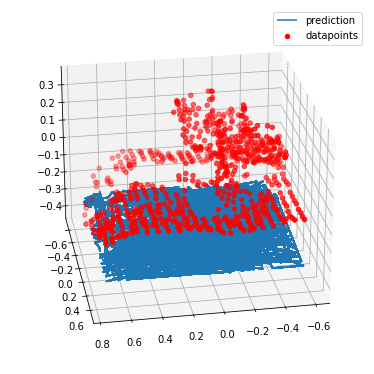

In [12]:
# Combining those two

import matplotlib.pyplot as plt
import open3d as o3d
import scipy.optimize as optimize
import numpy as np
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# XY = [(11, 70), (11, 75), (11, 80), (11, 85), (12, 70), (12, 75), (12, 80), (12, 85), (13, 70), (13, 75), (13, 80), (13, 85)]

# x = [11,11,11,11,12,12,12,12,13,13,13,13]
# y = [70,75,80,85,70,80,85,13,13,13,85,85]

# Z = [203.84, 208, 218.4, 235.872, 228.30080000000004, 232.96000000000004, 244.60800000000006, 264.1766400000001, 254.8, 260, 273, 294.84000000000003]
import random
import glob
import open3d as o3d
import numpy as np

pcd_list = glob.glob('./normalized_shapefitting/*')

pcd = o3d.io.read_point_cloud(pcd_list[0])
pcd_arr = np.asarray(pcd.points)
X = pcd_arr[:,0]
Y = pcd_arr[:,1]
Z = pcd_arr[:,2]
# X, Y = np.meshgrid(X, Y)
XY = [(X[i], Y[i],) for i in range(0, len(X))]
# print(X)
# print(Y.shape)
# print(Z)
# print(popt)

# undo later



guess = (1,1,1,1,1,1)

def fit(X, a, b, c, d, f, g):
    return a + (b*X[0])+(c*X[1]) +(d*X[0]**2)+(f*X[1]**2)+(g*X[0]*X[1])


# def fit(X, a, b, c, d, f, g):
#     return a*(X[0]**2) + 

popt,pcov = optimize.curve_fit(fit, np.transpose(XY), Z, guess)

# print(X[0])
# fitness_sample = random.sample(list(X), 100)
pred_z = [fit(X, *popt) for i in X]



xx = np.linspace( -10, 10, 100 )  ## <--- calculate against a continuous variable

# X, Ysq = np.meshgrid(X, Y)
pred_z, Ysq = np.meshgrid(pred_z, Y)
# Y, Z = np.meshgrid(Y, Z)


# visualize the results
fig = plt.figure(figsize = (5,5))
ax = Axes3D(fig)
# plot the fitted curve
ax.plot_wireframe(X, Y, pred_z, label = 'prediction')
# plot the target values
ax.scatter(X, Y, Z, c = 'r', label = 'datapoints')
ax.view_init(25, 80)
plt.legend()




In [4]:
print(X.shape)

(788, 788)


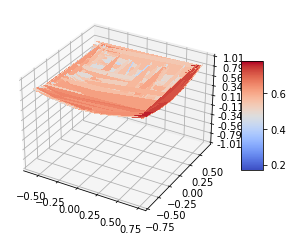

[[0.68771283 0.68652906 0.69879191 ... 0.45152277 0.6927492  0.66609533]
 [0.67670635 0.67548148 0.68816594 ... 0.42927424 0.68191662 0.65432353]
 [0.66669891 0.66543594 0.67851069 ... 0.40836927 0.67207023 0.64360526]
 ...
 [0.81602762 0.81527902 0.82305192 ... 0.67819349 0.81921677 0.80242022]
 [0.76778809 0.76688324 0.77627341 ... 0.5978766  0.77164169 0.75132213]
 [0.75764894 0.75671037 0.76644882 ... 0.58043392 0.76164575 0.74056379]]
[[ 0.72490132  0.72319669  0.74096864 ... -0.41216132  0.73217952
   0.69411552]
 [ 0.72490132  0.72319669  0.74096864 ... -0.41216132  0.73217952
   0.69411552]
 [ 0.72490132  0.72319669  0.74096864 ... -0.41216132  0.73217952
   0.69411552]
 ...
 [ 0.72490132  0.72319669  0.74096864 ... -0.41216132  0.73217952
   0.69411552]
 [ 0.72490132  0.72319669  0.74096864 ... -0.41216132  0.73217952
   0.69411552]
 [ 0.72490132  0.72319669  0.74096864 ... -0.41216132  0.73217952
   0.69411552]]


In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


pcd_list = glob.glob('./normalized_shapefitting/*')

pcd = o3d.io.read_point_cloud(pcd_list[0])
pcd_arr = np.asarray(pcd.points)
X = pcd_arr[:,0]
Y = pcd_arr[:,1]
Z = pcd_arr[:,2]
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
print(Z)
print(X)

ValueError: Argument Z must be 2-dimensional.

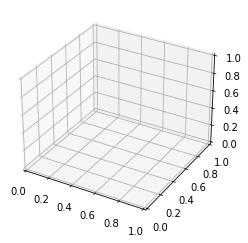

In [77]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (100, 2) and (788,)

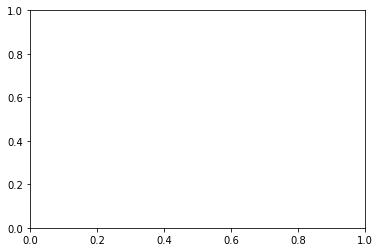

In [60]:

plt.plot(X, Y, 'o')
plt.plot(X, fitted)
plt.show()

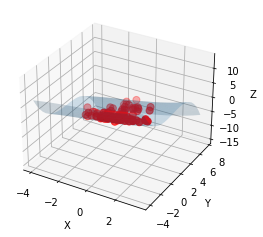

In [63]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.2,0.8], [-0.2,1.1,0.0], [0.8,0.0,1.0]])
data = np.random.multivariate_normal(mean, cov, 90)
data[:,1] = data[:,1]**2

# regular grid covering the domain of the data
r=4
X,Y = np.meshgrid(np.arange(-r, r, 0.5), np.arange(-r, r*2, 0.5))
XX = X.flatten()
YY = Y.flatten()

order = 3   # 1: linear, 2: quadratic, 3: cubic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

elif order == 3:
    # best-fit cubic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2, data[:,:2]**3]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2, XX**3, YY**3], C).reshape(X.shape)


# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('auto')
ax.axis('tight')
plt.show()



In [21]:
import sklearn as sk

import numpy as np

X = np.array([
    [1,2,3],
    [4,5,6]
])

poly = sk.preprocessing.PolynomialFeatures(degree = 2)

poly.fit_transform(X)

array([[ 1.,  1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5.,  6., 16., 20., 24., 25., 30., 36.]])

PolynomialFeatures()

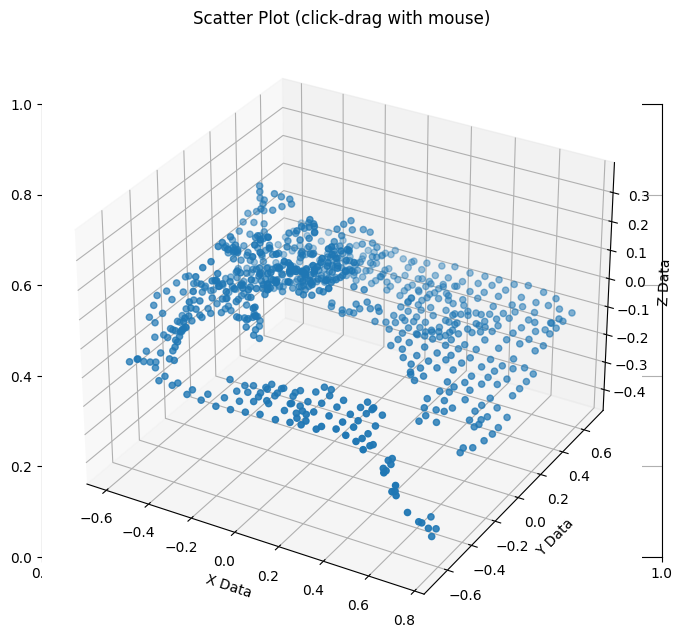

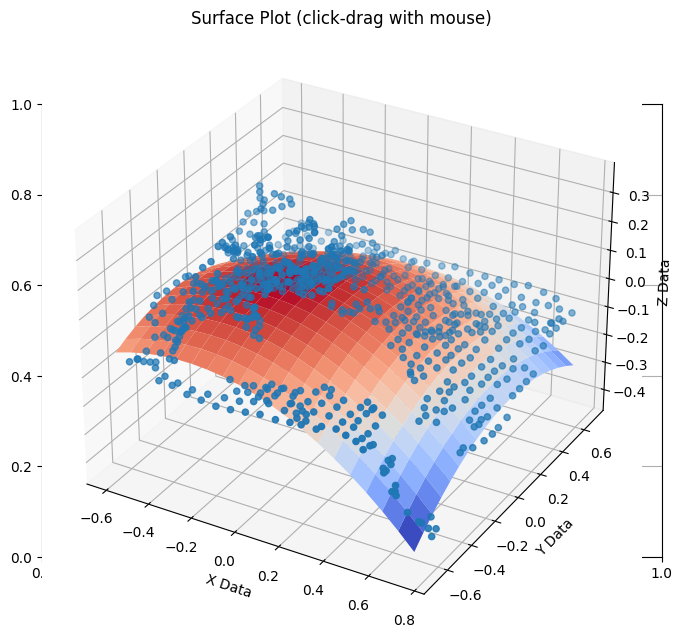

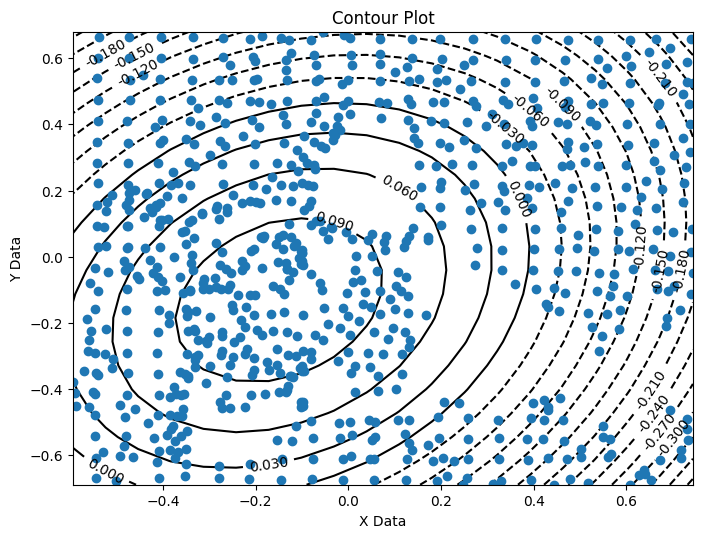

fitted prameters [ 0.09810079 -0.09513076 -0.05955997 -0.39853506 -0.32677596  0.17845919]
RMSE: 0.08920127477952934
R-squared: 0.5391571108892336


In [27]:
import numpy, scipy, scipy.optimize
import matplotlib
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red
import matplotlib.pyplot as plt

graphWidth = 800 # units are pixels
graphHeight = 600 # units are pixels

# 3D contour plot lines
numberOfContourLines = 16


def SurfacePlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title('Surface Plot (click-drag with mouse)') # add a title for surface plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    axes.set_zlabel('Z Data') # Z axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def ContourPlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot(x_data, y_data, 'o')

    axes.set_title('Contour Plot') # add a title for contour plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    CS = matplotlib.pyplot.contour(X, Y, Z, numberOfContourLines, colors='k')
    matplotlib.pyplot.clabel(CS, inline=1, fontsize=10) # labels for contours

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def ScatterPlot(data):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    axes.scatter(x_data, y_data, z_data)

    axes.set_title('Scatter Plot (click-drag with mouse)')
    axes.set_xlabel('X Data')
    axes.set_ylabel('Y Data')
    axes.set_zlabel('Z Data')

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


# def func(data, a, alpha, beta):
#     # data = np.array(-1, dtype=np.complex)
#     t = data[0]
#     p_p = data[1]
#     # t = np.array(t, dtype=np.complex)
#     # p_p = np.array(p_p, dtype=np.complex)
#     return a * (np.sign(t) * (np.abs(t)) **alpha) * (np.sign(p_p) * (np.abs(p_p)) **beta)
#     # return a * (t**alpha) * (p_p**beta)

# # guess = (1,1,1,1,1,1)

def func(X, a, b, c, d, f, g):
    return a + (b*X[0])+(c*X[1]) +(d*X[0]**2)+(f*X[1]**2)+(g*X[0]*X[1])


# xData = numpy.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
# yData = numpy.array([11.0, 12.1, 13.0, 14.1, 15.0, 16.1, 17.0, 18.1, 90.0])
# zData = numpy.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.0, 9.9])

import matplotlib.pyplot as plt
import open3d as o3d
import scipy.optimize as optimize
import numpy as np
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# XY = [(11, 70), (11, 75), (11, 80), (11, 85), (12, 70), (12, 75), (12, 80), (12, 85), (13, 70), (13, 75), (13, 80), (13, 85)]

# x = [11,11,11,11,12,12,12,12,13,13,13,13]
# y = [70,75,80,85,70,80,85,13,13,13,85,85]

# Z = [203.84, 208, 218.4, 235.872, 228.30080000000004, 232.96000000000004, 244.60800000000006, 264.1766400000001, 254.8, 260, 273, 294.84000000000003]
import random
import glob
import open3d as o3d
import numpy as np

pcd_list = glob.glob('./normalized_shapefitting/*')

pcd = o3d.io.read_point_cloud(pcd_list[0])
pcd_arr = np.asarray(pcd.points)
xData = pcd_arr[:,0]
yData = pcd_arr[:,1]
zData = pcd_arr[:,2]
# X, Y = np.meshgrid(

data = [xData, yData, zData]

# initialParameters = [1.0, 1.0, 1.0] # these are the same as scipy default values in this example

# here a non-linear surface fit is made with scipy's curve_fit()
fittedParameters, pcov = scipy.optimize.curve_fit(func, [xData, yData], zData)

ScatterPlot(data)
SurfacePlot(func, data, fittedParameters)
ContourPlot(func, data, fittedParameters)

print('fitted prameters', fittedParameters)

modelPredictions = func(data, *fittedParameters) 

absError = modelPredictions - zData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(zData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

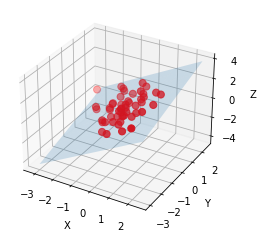

In [43]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
data = np.random.multivariate_normal(mean, cov, 50)

# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
XX = X.flatten()
YY = Y.flatten()

order = 1    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('auto')
ax.axis('tight')
plt.show()

In [46]:
import numpy as np
from itertools import combinations
import scipy.linalg
x = [1.2, 1.3, 1.6, 2.5, 2.3, 2.8]
y = [167.0, 180.3, 177.8, 160.4, 179.6, 154.3]
z = [-0.3, -0.8, -0.75, -1.21, -1.65, -0.68]
f = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]).transpose()

G = np.c_[x, y, z]

A = np.concatenate((G, np.ones((G.shape[0],1))), axis=1)
C, _, _, _ = scipy.linalg.lstsq(A, f)
# C will have now the coefficients for:
# f(x, y, z) = ax + by + cz + d

# quadratic eq.
dim = G.shape[1]
A = np.concatenate((G**2, np.array([np.prod(G[:, k], axis=1) for k in combinations(range(dim), dim-1)]).transpose(), G, np.ones((G.shape[0], 1))), axis=1)
C, _, _, _ = scipy.linalg.lstsq(A, f)
# C will have now the coefficients for:
# f(x, y, z) = ax**2 + by**2 + cz**2 + dxy+ exz + fyz + gx + hy + iz + j

# This can be used then:
def quadratic(a):
    dim = a.shape[0]
    A = np.concatenate((a**2, np.array([np.prod(a[k,]) for k in combinations(range(dim), dim-1)]), a, [1]))
    return np.sum(np.dot(A, C))

for i in range(G.shape[0]):
    print(quadratic(G[i,:]), f[i])

0.10000000000048757 0.1
0.19999999999940932 0.2
0.29999999999977417 0.3
0.3999999999992878 0.4
0.4999999999998362 0.5
0.5999999999994609 0.6


1
['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5', 'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5', 'x0^6', 'x0^5 x1', 'x0^4 x1^2', 'x0^3 x1^3', 'x0^2 x1^4', 'x0 x1^5', 'x1^6']


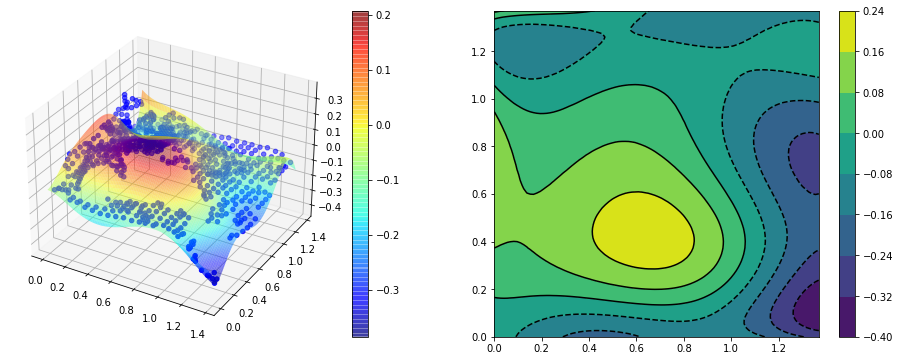

In [97]:
# Working implementation


from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
import open3d as o3d
import scipy.optimize as optimize
import numpy as np
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import random
import glob


# Variables
pcd_list = glob.glob('./normalized_shapefitting/*')

plant_choice = 0

deg_of_poly = 6




pcd = o3d.io.read_point_cloud(pcd_list[plant_choice])

# pcd, ind = pcd.remove_radius_outlier(nb_points=10, radius=0.2)

# pcd, ind = pcd.remove_statistical_outlier(nb_neighbors=1000,
#                                                     std_ratio=.5)


# pcd, ind = pcd.remove_radius_outlier(nb_points=10, radius=0.1)

pcd_arr = np.asarray(pcd.points)
# print(pcd_arr)

xmin = pcd_arr[:,0].min()
ymin = pcd_arr[:,1].min()

movement = [xmin, ymin, 0]

pcd_arr = pcd_arr - movement



X = pcd_arr[:,0:2]
Y = pcd_arr[:,-1]

datapoints = pcd_arr

# 5 degree polynomial features

poly = PolynomialFeatures(degree=deg_of_poly)
X_ = poly.fit_transform(X)
# Fit linear model
clf = linear_model.LinearRegression()
clf.fit(X_, Y)

# The test set, or plotting set
N = 100
Length = X.max()
predict_x0, predict_x1 = np.meshgrid(np.linspace(0, Length, N), 
                                     np.linspace(0, Length, N))
predict_x = np.concatenate((predict_x0.reshape(-1, 1), 
                            predict_x1.reshape(-1, 1)), 
                           axis=1)
predict_x_ = poly.fit_transform(predict_x)
predict_y = clf.predict(predict_x_)

# Plot
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape), 
                        rstride=1, cstride=1, cmap=cm.jet, alpha=0.5)
ax1.scatter(datapoints[:, 0], datapoints[:, 1], datapoints[:, 2], c='b', marker='o')

# ax1.set_xlim((2, -2))
# ax1.set_ylim((-2, 2))
# print(clf.coef_.mean())
print((clf.coef_ > clf.coef_.mean()).sum())
print(poly.get_feature_names())


fig.colorbar(surf, ax=ax1)
ax2 = fig.add_subplot(122)
cs = ax2.contourf(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape))
ax2.contour(cs, colors='k')
fig.colorbar(cs, ax=ax2)
plt.show()


# clf.coef == the coefficents
# poly.get_feature_names() == the parts of the equation

In [51]:
X.max()


1.369557797908783

In [35]:
np.ptp(pcd_arr[0])

0.9697073698043823